# Generate a light curve

In this tutorial we take a look at how to generate transit light curves for a specified transmission string. Let us start by importing the required packages and instantiating the HarmonicaTransit class. Here you must specify the times at which you want to evaluate the light curve model.

In [1]:
import numpy as np
from harmonica import HarmonicaTransit


times = np.linspace(-0.2, 0.2, 500)  # [days]

ht = HarmonicaTransit(times)

Next, you must set the system parameters. First, set the orbital parameters.

In [2]:
t0=0.                   # [days]
period=4.               # [days]
a=7.                    # [stellar radii]
inc=86. * np.pi / 180.  # [radians]
ecc=0.                  # []
omega=0.                # [radians]

ht.set_orbit(t0, period, a, inc, ecc, omega)

Second, set the limb-darkening law and its parameters. 

In [3]:
u = np.array([0.074, 0.193])

ht.set_stellar_limb_darkening(u, limb_dark_law="quadratic")

And third, set the planet's transmission string. The transmission string parameters should be provided in an array with order $r = [a_0, a_1, b_1, a_2, b_2,..]$, where $a_n$ and $b_n$ are the Fourier parameters as described in the intro to [transmission strings](<../transmission_strings.html>). In this case we specifiy a 5-parameter transmission string.

In [4]:
r = np.array([0.1, -0.01, 0., 0.01, 0.])  # [stellar radii]

ht.set_planet_transmission_string(r)

You can visualise your transmission string by calling:

In [5]:
theta = np.linspace(-np.pi, np.pi, 1000)
transmission_string = ht.get_planet_transmission_string(theta)

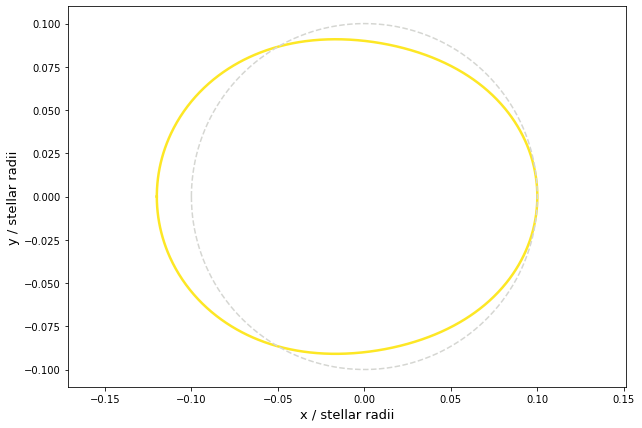

In [6]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
plt.gca().set_aspect("equal", "datalim")
plt.plot(transmission_string * np.cos(theta), transmission_string * np.sin(theta), 
         c=cm.viridis(1.), lw=2.5, label="Transmission string")
plt.plot(r[0] * np.cos(theta), r[0] * np.sin(theta), 
         c="#d5d6d2", ls="--", label="Reference circle")
plt.xlabel("x / stellar radii", fontsize=13)
plt.ylabel("y / stellar radii", fontsize=13)
plt.show()

After the system parameters have been set, the transit light curve can be computed:

In [7]:
light_curve = ht.get_transit_light_curve()

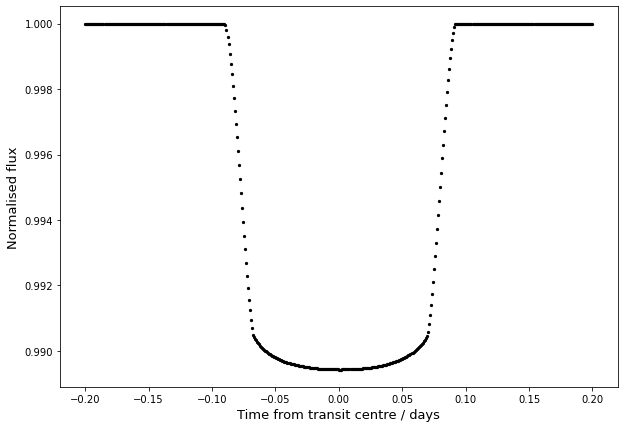

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(times, light_curve, c="#000000", s=5)
plt.xlabel("Time from transit centre / days", fontsize=13)
plt.ylabel("Normalised flux", fontsize=13)
plt.show()